In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Simulated AML transaction dataset
data = {
    'transaction_id': [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010],
    'customer_id': [2001, 2002, 2003, 2002, 2005, 2006, 2007, 2008, 2009, 2010],
    'customer_name': ['John Smith', 'Alice Brown', 'Bob Johnson', 'Alice Brown', 'Eva White', 
                       'Frank Harris', 'Grace Miller', 'Helen King', 'Ivy Clark', 'Jack Lewis'],
    'transaction_amount': [5000, 150000, 300, 75000, 12000, 6000, 200000, 1000, 4000, 200000],
    'transaction_date': ['2024-01-15', '2024-01-16', '2024-02-16', '2024-01-17', '2024-01-18',
                         '2024-03-19', '2024-03-20', '2024-01-21', '2024-01-22', '2024-02-23'],
    'transaction_type': ['Deposit', 'Withdrawal', 'Deposit', 'Withdrawal', 'Deposit', 
                          'Deposit', 'Withdrawal', 'Deposit', 'Withdrawal', 'Withdrawal'],
    'account_type': ['Savings', 'Checking', 'Savings', 'Checking', 'Savings',
                     'Savings', 'Checking', 'Savings', 'Checking', 'Checking'],
    'suspicious_flag': [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df

,transaction_id,customer_id,customer_name,transaction_amount,transaction_date,transaction_type,account_type,suspicious_flag
0,10001,2001,John Smith,5000,2024-01-15,Deposit,Savings,0
1,10002,2002,Alice Brown,150000,2024-01-16,Withdrawal,Checking,1
2,10003,2003,Bob Johnson,300,2024-02-16,Deposit,Savings,0
3,10004,2002,Alice Brown,75000,2024-01-17,Withdrawal,Checking,1
4,10005,2005,Eva White,12000,2024-01-18,Deposit,Savings,0
5,10006,2006,Frank Harris,6000,2024-03-19,Deposit,Savings,0
6,10007,2007,Grace Miller,200000,2024-03-20,Withdrawal,Checking,1
7,10008,2008,Helen King,1000,2024-01-21,Deposit,Savings,0
8,10009,2009,Ivy Clark,4000,2024-01-22,Withdrawal,Checking,0
9,10010,2010,Jack Lewis,200000,2024-02-23,Withdrawal,Checking,1


### **Task 1: Identify suspicious transactions and analyze amounts**

In [2]:
suspecious_flag = df[df['suspicious_flag'] == 1]
total_suspicious_amt = df['transaction_amount'].sum()
print('total_suspicious_amt: ',total_suspicious_amt)

total_suspicious_amt:  653300


### **Task 2: Calculate the average transaction amount for each transaction type**

In [3]:
avg_trx_for_trx_type = df.groupby(['transaction_type'])['transaction_amount'].mean()
print('avg_trx_for_trx_type: ',avg_trx_for_trx_type)

avg_trx_for_trx_type:  transaction_type
Deposit         4860.0
Withdrawal    125800.0
Name: transaction_amount, dtype: float64


average transaction for each transaction type:
 transaction_type
Deposit         4860.0
Withdrawal    125800.0
Name: transaction_amount, dtype: float64


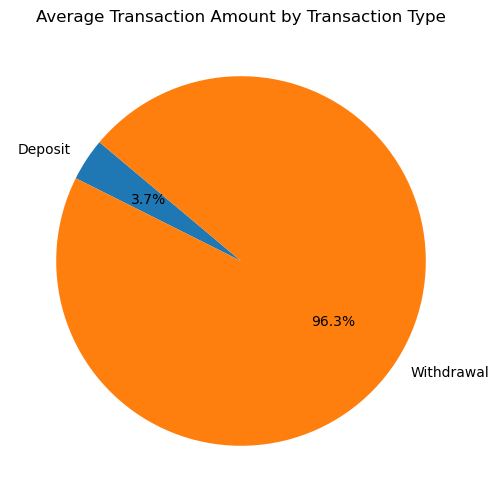

In [4]:
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(avg_trx_for_trx_type, labels=avg_trx_for_trx_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Transaction Amount by Transaction Type')
print('average transaction for each transaction type:\n',avg_trx_for_trx_type)
plt.show()

### **Task 3: Identify customers with more than one suspicious transaction**

In [5]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
suspicious_trx = df[df['suspicious_flag'] == 1]
suspicious_customers = suspicious_trx.groupby('customer_id').size()
print("Size :",suspicious_customers)
suspicious_customers = suspicious_customers[suspicious_customers > 1]
suspicious_customers

Size : customer_id
2002    2
2007    1
2010    1
dtype: int64


customer_id
2002    2
dtype: int64

### **Task 4: Calculate the total transaction amount for each account type**

In [6]:
tot_trx_amt_acc_type = df.groupby('account_type')['transaction_amount'].sum()
tot_trx_amt_acc_type

account_type
Checking    629000
Savings      24300
Name: transaction_amount, dtype: int64

### **Task 5: Convert 'transaction_date' to datetime format and calculate number of transactions per month**

In [7]:
num_of_trx_per_month = df.resample('M',on='transaction_date').size()
num_of_trx_per_month

transaction_date
2024-01-31    6
2024-02-29    2
2024-03-31    2
Freq: M, dtype: int64

### **Task 6: Find the highest and lowest transaction amount for each customer**

In [8]:
cust_high_low_trx = df.groupby('customer_id')['transaction_amount'].agg(['min', 'max'])
cust_high_low_trx

,min,max
customer_id,,
2001,5000,5000
2002,75000,150000
2003,300,300
2005,12000,12000
2006,6000,6000
2007,200000,200000
2008,1000,1000
2009,4000,4000
2010,200000,200000


### **Task 7: Analyze patterns of suspicious activity**

In [9]:
import matplotlib.pyplot as plt

In [10]:
suspicious_trx

,transaction_id,customer_id,customer_name,transaction_amount,transaction_date,transaction_type,account_type,suspicious_flag
1,10002,2002,Alice Brown,150000,2024-01-16,Withdrawal,Checking,1
3,10004,2002,Alice Brown,75000,2024-01-17,Withdrawal,Checking,1
6,10007,2007,Grace Miller,200000,2024-03-20,Withdrawal,Checking,1
9,10010,2010,Jack Lewis,200000,2024-02-23,Withdrawal,Checking,1


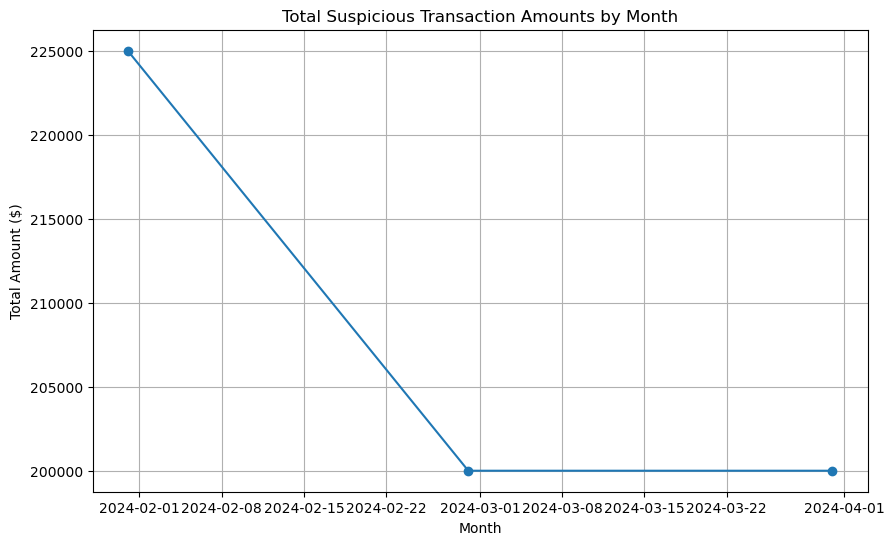

In [11]:
suspicious_per_month = suspicious_trx.resample('M', on='transaction_date').sum()
plt.figure(figsize=(10, 6))
plt.plot(suspicious_per_month.index, suspicious_per_month['transaction_amount'], marker='o')
plt.title('Total Suspicious Transaction Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount ($)')
plt.grid(True)
plt.show()

### **Task 8: Create a flag for unusually high transactions**

In [12]:
avg_amt_by_account = df.groupby('account_type')['transaction_amount'].mean()
avg_amt_by_account

account_type
Checking    125800.0
Savings       4860.0
Name: transaction_amount, dtype: float64

In [13]:
df['high_value_flag'] = df.apply(lambda row: 1 if row['transaction_amount'] > 1.5*avg_amt_by_account[row['account_type']] else 0, axis = 1)
high_value = df[df['high_value_flag'] == 1]
high_value

,transaction_id,customer_id,customer_name,transaction_amount,transaction_date,transaction_type,account_type,suspicious_flag,high_value_flag
4,10005,2005,Eva White,12000,2024-01-18,Deposit,Savings,0,1
6,10007,2007,Grace Miller,200000,2024-03-20,Withdrawal,Checking,1,1
9,10010,2010,Jack Lewis,200000,2024-02-23,Withdrawal,Checking,1,1


In [14]:
df.to_csv("E:/datasets/aml_dataset.csv",index = False)